In [1]:
from tensorflow import keras 
from keras.datasets import mnist 
from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense
from keras.layers import AveragePooling2D 
from keras.models import Sequential


### loading the dataset and performing the test train split 


In [9]:
(X_train , y_train) , (X_test , y_test) = mnist.load_data()


In [10]:
X_test.shape , X_train.shape

((10000, 28, 28), (60000, 28, 28))

In [11]:
X_train.shape
# We need to reshape the dataset to be in the shape as required by the 
# lenet model 
X_train = X_train.reshape(X_train.shape[0] , 28 , 28 , 1)
X_test = X_test.reshape(X_test.shape[0] , 28 , 28 , 1)

# because we are using the convulational layer we need to add a channel 



In [13]:
# let's normalize the data
X_train =X_train / 255.0
X_test = X_test / 255.0


In [17]:
import numpy as np
num_classes=len(np.unique(y_train))

In [18]:
y_train = keras.utils.to_categorical(y_train , num_classes= 10)
y_test = keras.utils.to_categorical(y_test , num_classes= num_classes)


model buliding 

In [19]:
from turtle import mode


model = Sequential()
model.add(Conv2D(6 , kernel_size=(5,5) , input_shape = (28 ,28 , 1) , activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16 , kernel_size=(5,5) , activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(120 , kernel_size=(5,5) , activation='relu', padding = 'same' , strides = (1,1)))
model.add(Flatten())
model.add(Dense(84 , activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()


c:\Users\manas\OneDrive\Desktop\DL CampusX\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1920)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │       161,364 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,906 (831.66 KB)

 Trainable params: 212,906 (831.66 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
from tabnanny import verbose
from keras.callbacks import ModelCheckpoint

callback = ModelCheckpoint(filepath = 'bestLeNet.h5' , monitor = 'val_loss' , verbose = 1 , save_best_only = True)


In [22]:
model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

history = model.fit(X_train , y_train , epochs=10 , batch_size=32 , validation_split=0.2 , verbose = 1 , callbacks = callback)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9855 - loss: 0.0479
Epoch 1: val_loss improved from 0.08803 to 0.04184, saving model to bestLeNet.h5


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9855 - loss: 0.0463 - val_accuracy: 0.9879 - val_loss: 0.0418
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9896 - loss: 0.0339
Epoch 2: val_loss did not improve from 0.04184
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9898 - loss: 0.0329 - val_accuracy: 0.9849 - val_loss: 0.0563
Epoch 3/10
1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9924 - loss: 0.0225
Epoch 3: val_loss did not improve from 0.04184
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9913 - loss: 0.0257 - val_accuracy: 0.9856 - val_loss: 0.0473
Epoch 4/10
1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9933 - loss: 0.0200
Epoch 4: val_loss did not improve from 0.04184
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9931 - loss: 0.0214 - val_accuracy: 0.9870 - val_loss: 0.0516
Epoch 5/10
1495/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9962 - loss: 0.0134
Epoch 5: val_loss did not

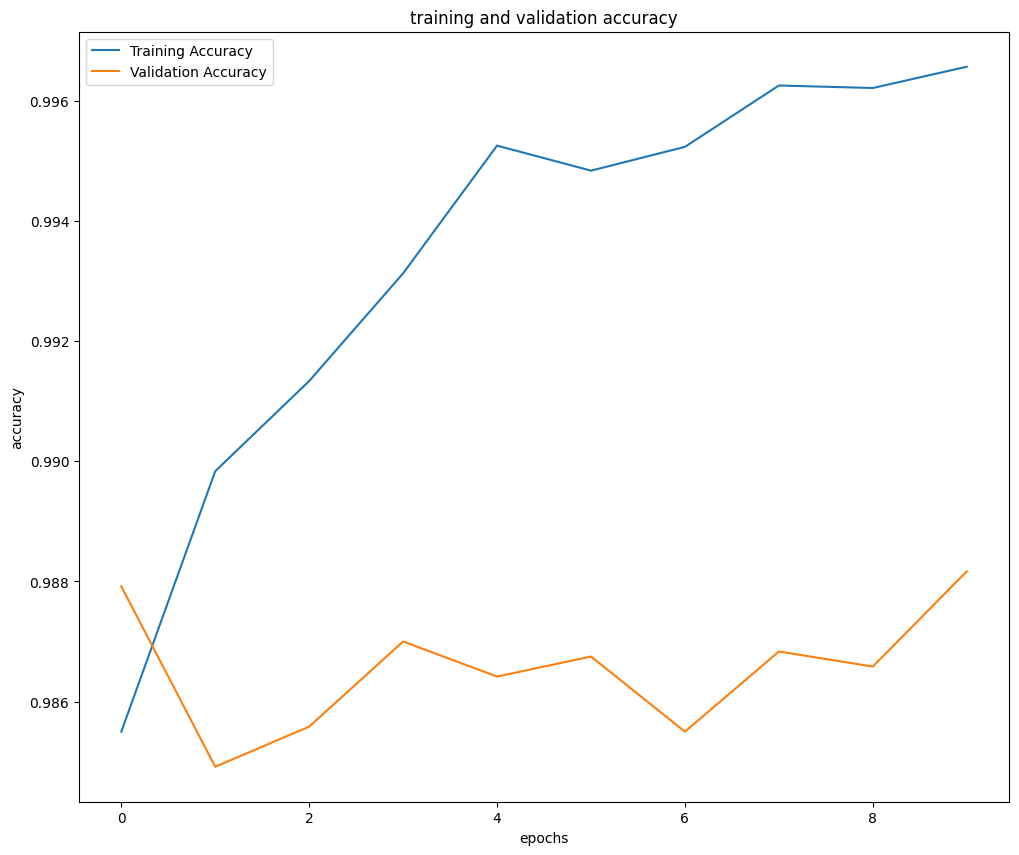

In [25]:
# this is the script for checking the implementation of the Model trained through graphs 

import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 


fig= plt.figure(figsize=(12, 10))
plt.plot(history.history['accuracy'] , label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'] , label = 'Validation Accuracy')
plt.title("training and validation accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()




we can clearly see the overfitting is happening in the trainiun set and one more thing is that the accuracy is not increasing in the vaoidation set 


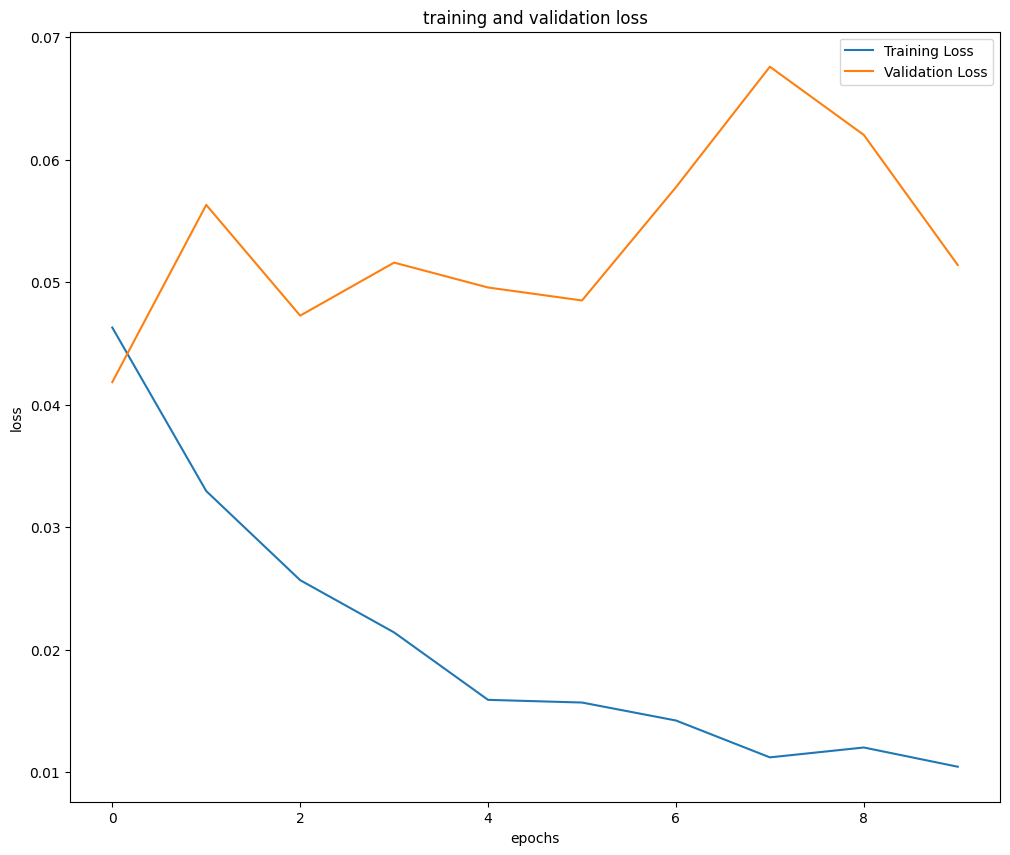

In [26]:
plt.figure(figsize=(12 , 10))
plt.plot(history.history['loss'] , label = 'Training Loss')
plt.plot(history.history['val_loss'] , label = 'Validation Loss')
plt.title("training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


In [27]:
import tensorflow as tf

print("GPUs available:", tf.config.list_physical_devices('GPU'))


GPUs available: []


In [28]:
!pip uninstall tensorflow -y

Found existing installation: tensorflow 2.20.0
Uninstalling tensorflow-2.20.0:
  Successfully uninstalled tensorflow-2.20.0


You can safely remove it manually.


In [29]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple/
  Using cached tensorflow-2.20.0-cp310-cp310-win_amd64.whl.metadata (4.6 kB)
Using cached tensorflow-2.20.0-cp310-cp310-win_amd64.whl (331.7 MB)


In [30]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[]


In [35]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[]


In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))



[]


In [2]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))


2.15.0
[]


In [ ]:
import tensorflow as tf
print(tf.sysconfig.get_build_info())





OrderedDict([('is_cuda_build', False), ('is_rocm_build', False), ('is_tensorrt_build', False), ('msvcp_dll_names', 'msvcp140.dll,msvcp140_1.dll')])


In [3]:
!pip install --upgrade tensorflow


Looking in indexes: https://pypi.org/simple/
  Using cached tensorflow-2.20.0-cp310-cp310-win_amd64.whl.metadata (4.6 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.12.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached ml_dtypes-0.5.4-cp310-cp310-win_amd64.whl.metadata (9.2 kB)
Using cached tensorflow-2.20.0-cp310-cp310-win_amd64.whl (331.7 MB)
Using cached ml_dtypes-0.5.4-cp310-cp310-win_amd64.whl (210 kB)
Using cached tensorboard-2.20.0-py3-none-any.whl (5.5 MB)
Using cached keras-3.12.0-py3-none-any.whl (1.5 MB)

  Attempting uninstall: protobuf

    Found existing installation: protobuf 4.25.8

    Uninstalling protobuf-4.25.8:

      Successfully uninstalled protobuf-4.25.8

   ---------------------------------------- 0/5 [protobuf]
   ---------------------------------------- 0/5 [protobuf]
   ---------------------------------------- 0/5 [protobuf]
   ---------------------------------------- 0/5 [protobuf]
   ----------------------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\manas\\OneDrive\\Desktop\\DL CampusX\\.venv\\Lib\\site-packages\\tensorflow\\compiler\\mlir\\quantization\\tensorflow\\python\\pywrap_quantize_model.pyd'
Check the permissions.

